**MedCamp** – a not for profit organization dedicated in making health conditions for working professionals better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

 

**The Process:**
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.
 

Other things to note:
Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
For a few camps, there was hardware failure, so some information about date and time of registration is lost.
MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.


**Favorable outcome:**
For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
You need to predict the chances (probability) of having a favourable outcome.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
pd.set_option('display.max_colwidth', None)

In [84]:
data_dict = pd.read_excel("Data_Dictionary.xlsx")

In [85]:
data_dict

,Details of the Files
0,"Health_Camp_Detail.csv – File containing Health_Camp_Id, Camp_Start_Date, Camp_End_Date and Category details of each camp."
1,"Train.csv – File containing registration details for all the test camps. This includes Patient_ID, Health_Camp_ID, Registration_Date and a few anonymized variables as on registration date."
2,"Patient_Profile.csv – This file contains Patient profile details like Patient_ID, Online_Follower, Social media details, Income, Education, Age, First_Interaction_Date, City_Type and Employer_Category"
3,First_Health_Camp_Attended.csv – This file contains details about people who attended health camp of first format. This includes Donation (amount) & Health_Score of the person.
4,Second_Health_Camp_Attended.csv - This file contains details about people who attended health camp of second format. This includes Health_Score of the person.
5,Third_Health_Camp_Attended.csv - This file contains details about people who attended health camp of third format. This includes Number_of_stall_visited & Last_Stall_Visited_Number.
6,"Test.csv – File containing registration details for all the test camps. This includes Patient_ID, Health_Camp_ID, Registration_Date and a few anonymized variables as on registration date."


In [86]:
pd.read_excel("Data_Dictionary.xlsx", sheet_name = "Health_Camp_Detail.csv")

,Field_Name,Description
0,Health_Camp_ID,Unique Identifier for each camp. This ID is not sequential in nature and can not be used in modeling
1,Camp_Start_Date,Start Date of the Health Camp
2,Camp_End_Date,End Date of the Health Camp
3,Category1,Category segmentation of the Health Camp - 1
4,Category2,Category segmentation of the Health Camp - 2
5,Category3,Category segmentation of the Health Camp - 3


Let's explore Health_Camp_Detail data

In [87]:
camp_det = pd.read_csv("Health_Camp_Detail.csv")

In [88]:
camp_det

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1
...,...,...,...,...,...,...
60,6556,09-Nov-06,15-Dec-06,First,E,2
61,6551,13-Nov-06,18-Nov-06,Second,D,2
62,6559,11-Dec-06,12-Mar-07,First,F,2
63,6567,30-Jan-07,04-Feb-07,Second,D,2


In [89]:
camp_det["Health_Camp_ID"].nunique()

65

In [90]:
camp_det["Category1"].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [91]:
#Health camp -1
camp_det["Category1"].value_counts()

Category1
First     44
Second    11
Third     10
Name: count, dtype: int64

In [92]:
def pie_chart(df,column):
    fdt_col = df[column].value_counts(dropna=False)
    plt.pie(fdt_col.values, labels = fdt_col.index, autopct = "%.2f %%", shadow=True)
    plt.title(column)
    plt.show()

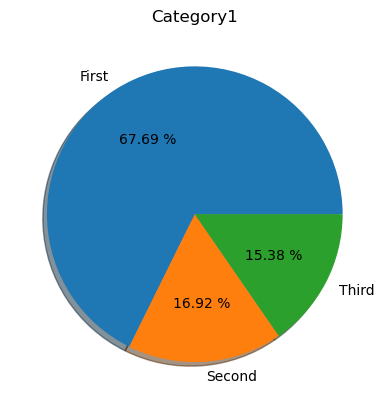

In [93]:
pie_chart(camp_det, "Category1")

In Health camp -1 most of the camps are based on First Category1, follwoed by second and third

In [94]:
camp_det["Category2"].value_counts()

Category2
C    16
E    15
F    11
G    10
A     7
D     4
B     2
Name: count, dtype: int64

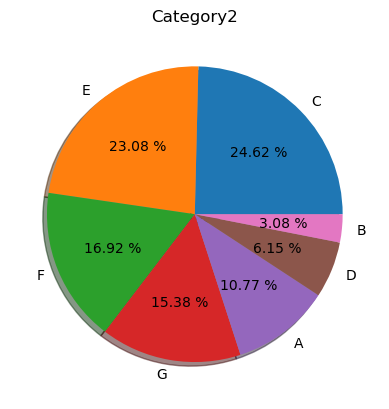

In [95]:
pie_chart(camp_det, "Category2")

In Health camp -2 most of the camps are based on E,C AMD F etc...

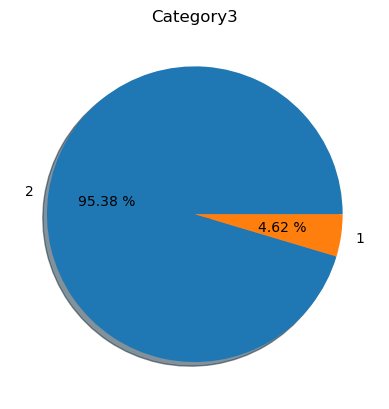

In [96]:
pie_chart(camp_det, "Category3")

In [97]:
train = pd.read_csv("Train.csv")

In [98]:
train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7
...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,0,0,0,0
75274,511952,6528,13-Feb-06,0,0,0,0,0
75275,521236,6554,24-May-05,0,0,0,0,0
75276,518817,6580,22-Dec-04,0,0,0,0,0


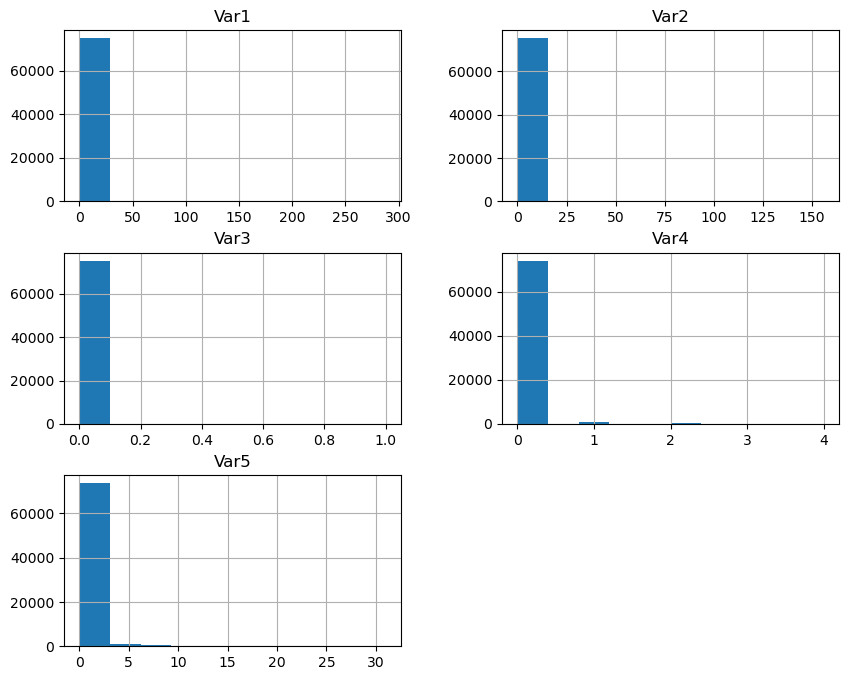

In [99]:
train[["Var1","Var2","Var3","Var4","Var5"]].hist(figsize = (10,8))
plt.show()

In [100]:
train[["Var1","Var2","Var3","Var4","Var5"]].std()

Var1    7.626687
Var2    3.769594
Var3    0.019624
Var4    0.199570
Var5    1.213938
dtype: float64

In [101]:
train["Var3"].value_counts()

Var3
0    75249
1       29
Name: count, dtype: int64

In [102]:
train["Var4"].value_counts()

Var4
0    74134
1      717
2      323
3       91
4       13
Name: count, dtype: int64

In [103]:
train[["Var1","Var2","Var3","Var4","Var5"]].corr()

,Var1,Var2,Var3,Var4,Var5
Var1,1.000000,0.823730,0.338701,0.369572,0.754567
Var2,0.823730,1.000000,0.661589,0.338850,0.691071
Var3,0.338701,0.661589,1.000000,0.194531,0.368489
Var4,0.369572,0.338850,0.194531,1.000000,0.495021
Var5,0.754567,0.691071,0.368489,0.495021,1.000000


In [104]:
train.drop(["Var2","Var3","Var4","Var5"], axis = 1,inplace = True)

So from the above analysis,

Var3,Var4 and Var5 has very low std deviation, so these varisbles can be dropped

var1 has high correlation with var 2 and Var5 so we can drop var2

###### Paitent Profile

In [105]:
pd.read_excel("Data_Dictionary.xlsx", sheet_name = "Patient_Profile.csv")

,Field_Name,Description
0,Patient_ID,Unique Identifier for each patient. This ID is not sequential in nature and can not be used in modeling
1,Online_Follower,Whether a patient follows MedCamp online or not
2,Linkedin_Shared,Whether the patient has shared details of a camp on his LinkedIn id
3,Twitter_Shared,Whether the patient has tweeted about the health camp
4,Facebook_Shared,Whether the patient has shared an update about the health camp
5,Income,Income of the patient
6,Education_Score,Score about education of the patient. Higher would mean better
7,Age,Age of the patient (as captured at time of registration)
8,First_Interaction,Date of first interaction
9,City_Type,Category of the city


In [106]:
patient_profile = pd.read_csv("Patient_Profile.csv")

In [107]:
patient_profile = patient_profile.replace("None",np.nan)

In [108]:
patient_profile

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,02-Nov-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,24-Nov-02,H,Others
...,...,...,...,...,...,...,...,...,...,...,...
37628,518600,0,0,0,0,NaN,NaN,NaN,28-Jan-07,NaN,NaN
37629,509515,0,0,0,0,NaN,NaN,NaN,27-Jan-07,NaN,NaN
37630,510713,0,0,0,0,NaN,NaN,NaN,01-Feb-07,H,NaN
37631,493667,0,0,0,0,NaN,NaN,NaN,27-Jan-07,NaN,NaN


In [109]:
patient_profile.isnull().sum()

Patient_ID               0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income               33271
Education_Score      36249
Age                  32618
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64

In [110]:
patient_profile["Online_Follower"].value_counts()

Online_Follower
0    36785
1      848
Name: count, dtype: int64

In [111]:
patient_profile["LinkedIn_Shared"].value_counts()

LinkedIn_Shared
0    36614
1     1019
Name: count, dtype: int64

In [112]:
patient_profile["Twitter_Shared"].value_counts()

Twitter_Shared
0    36820
1      813
Name: count, dtype: int64

In [113]:
patient_profile["Facebook_Shared"].value_counts()

Facebook_Shared
0    36747
1      886
Name: count, dtype: int64

In [114]:
patient_profile["Income"].astype("float").describe()

count    4362.000000
mean        1.077717
std         1.332109
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Income, dtype: float64

In [115]:
patient_profile["Education_Score"].astype("float").describe()

count    1384.000000
mean       78.231288
std         8.751698
min        45.000000
25%        72.000000
50%        79.000000
75%        85.000000
max       101.000000
Name: Education_Score, dtype: float64

In [116]:
patient_profile["Age"].astype("float").describe()

count    5015.000000
mean       49.129811
std        12.555632
min        30.000000
25%        40.000000
50%        44.000000
75%        52.000000
max        80.000000
Name: Age, dtype: float64

In [117]:
patient_profile["City_Type"].value_counts(dropna = False)

City_Type
NaN    23384
B       2662
H       2517
A       1729
D       1704
G       1352
E       1217
C       1216
I       1036
F        816
Name: count, dtype: int64

In [118]:
patient_profile["Employer_Category"].value_counts(dropna = False)

Employer_Category
NaN                  34793
Technology             649
Others                 477
Consulting             404
Software Industry      374
Education              188
BFSI                   167
Manufacturing          115
Retail                  91
Health                  88
Transport               65
Telecom                 58
Real Estate             57
Food                    56
Broadcasting            51
Name: count, dtype: int64

In [119]:
patient_profile

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,02-Nov-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,24-Nov-02,H,Others
...,...,...,...,...,...,...,...,...,...,...,...
37628,518600,0,0,0,0,NaN,NaN,NaN,28-Jan-07,NaN,NaN
37629,509515,0,0,0,0,NaN,NaN,NaN,27-Jan-07,NaN,NaN
37630,510713,0,0,0,0,NaN,NaN,NaN,01-Feb-07,H,NaN
37631,493667,0,0,0,0,NaN,NaN,NaN,27-Jan-07,NaN,NaN


In [120]:
fhc = pd.read_csv("First_Health_Camp_Attended.csv")

In [121]:
pd.read_excel("Data_Dictionary.xlsx", sheet_name = "First_Health_Camp_Attend")

,Field_Name,Description
0,Patient_ID,Unique Identifier for each patient. This ID is not sequential in nature and can not be used in modeling
1,Health_Camp_ID,Unique Identifier for each camp. This ID is not sequential in nature and can not be used in modeling
2,Donation,Amount of donation received at the camp
3,Health_Score,Health Score as detected by the test at the camp


In [122]:
fhc

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN
...,...,...,...,...,...
6213,502728,6575,10,0.509804,NaN
6214,511088,6575,20,0.078431,NaN
6215,507608,6575,40,0.627451,NaN
6216,488046,6575,50,0.686275,NaN


In [123]:
fhc.isnull().sum()

Patient_ID           0
Health_Camp_ID       0
Donation             0
Health_Score         0
Unnamed: 4        6218
dtype: int64

In [124]:
fhc.drop("Unnamed: 4", axis =1,inplace = True)

In [125]:
fhc

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390
...,...,...,...,...
6213,502728,6575,10,0.509804
6214,511088,6575,20,0.078431
6215,507608,6575,40,0.627451
6216,488046,6575,50,0.686275


In [126]:
fhc

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390
...,...,...,...,...
6213,502728,6575,10,0.509804
6214,511088,6575,20,0.078431
6215,507608,6575,40,0.627451
6216,488046,6575,50,0.686275


In [127]:
fhc["Donation"].describe()

count    6218.000000
mean       32.587649
std        24.501676
min        10.000000
25%        20.000000
50%        30.000000
75%        40.000000
max       330.000000
Name: Donation, dtype: float64

<Axes: xlabel='Donation'>

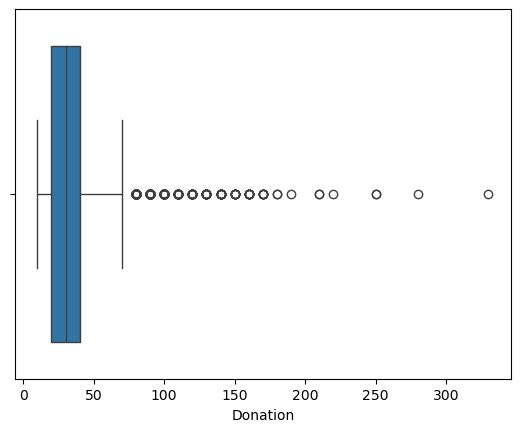

In [128]:
sns.boxplot(x = fhc["Donation"])

<Axes: xlabel='Donation', ylabel='Density'>

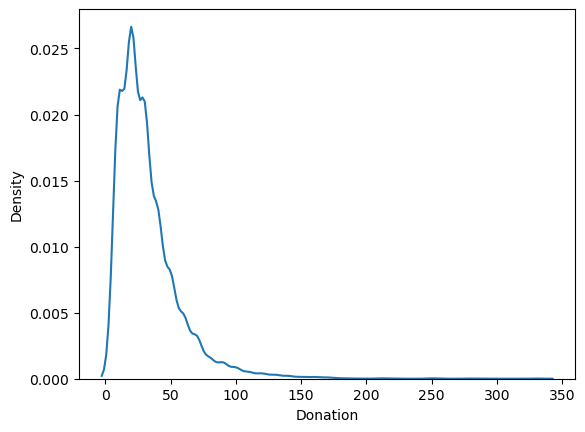

In [129]:
sns.kdeplot(x = fhc["Donation"])

In [130]:
fhc["Health_Score"].describe()

count    6218.000000
mean        0.517668
std         0.289211
min         0.001667
25%         0.263094
50%         0.529706
75%         0.771429
max         1.000000
Name: Health_Score, dtype: float64

In [131]:
shc = pd.read_csv("Second_Health_Camp_Attended.csv")

In [132]:
shc

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712
...,...,...,...
7814,490853,6529,0.103136
7815,499836,6529,0.507841
7816,511286,6529,0.627865
7817,522935,6529,0.252714


In [133]:
shc["Health Score"].describe()

count    7819.000000
mean        0.554178
std         0.249378
min         0.058993
25%         0.389626
50%         0.518797
75%         0.762724
max         1.000000
Name: Health Score, dtype: float64

In [134]:
thc = pd.read_csv("Third_Health_Camp_Attended.csv")

In [135]:
thc

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2
...,...,...,...,...
6510,503791,6527,3,3
6511,517319,6528,1,3
6512,517319,6578,4,3
6513,517319,6527,4,4


In [136]:
thc["Number_of_stall_visited"].describe()

count    6515.000000
mean        2.923254
std         1.688500
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: Number_of_stall_visited, dtype: float64

-------------

### Merge the data

In [137]:
train.shape

(75278, 4)

In [138]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1
0,489652,6578,10-Sep-05,4
1,507246,6578,18-Aug-05,45
2,523729,6534,29-Apr-06,0
3,524931,6535,07-Feb-04,0
4,521364,6529,28-Feb-06,15


In [139]:
camp_det.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [140]:
patient_profile.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,02-Nov-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,24-Nov-02,H,Others


In [141]:
camp_det.sample(41)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
38,6571,09-Oct-05,12-Oct-05,First,E,2
14,6539,07-Aug-04,12-Feb-05,First,F,2
46,6525,08-Apr-06,17-Apr-06,First,C,2
47,6566,18-Apr-06,25-Apr-06,First,E,2
31,6549,23-Jun-05,27-Jun-05,Second,A,2
44,6547,02-Apr-06,07-Apr-06,First,C,2
51,6583,02-Aug-06,05-Aug-06,Second,A,2
19,6540,01-Nov-04,04-Nov-04,First,E,2
6,6564,17-Dec-03,11-Jun-04,First,C,2
52,6584,04-Aug-06,09-Aug-06,Second,A,2


In [142]:
main_data = pd.merge(train, camp_det, how = "left", on = "Health_Camp_ID")

In [143]:
main_data

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,30-Mar-06,03-Apr-06,Second,A,2
...,...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,07-Aug-04,12-Feb-05,First,F,2
75274,511952,6528,13-Feb-06,0,10-Feb-06,25-Apr-06,Third,G,2
75275,521236,6554,24-May-05,0,19-Jun-05,01-Jul-05,First,B,2
75276,518817,6580,22-Dec-04,0,22-Dec-04,06-Jan-05,First,E,2


In [144]:
main_data.isnull().sum()

Patient_ID             0
Health_Camp_ID         0
Registration_Date    334
Var1                   0
Camp_Start_Date        0
Camp_End_Date          0
Category1              0
Category2              0
Category3              0
dtype: int64

In [145]:
patient_profile.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,02-Nov-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,24-Nov-02,H,Others


In [146]:
main_data = pd.merge(main_data, patient_profile, how = "left", on = "Patient_ID")

In [147]:
main_data

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,10-Sep-05,4,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,NaN,NaN,NaN,06-Dec-04,NaN,NaN
1,507246,6578,18-Aug-05,45,16-Aug-05,14-Oct-05,Third,G,2,0,0,0,0,1.0,75.0,40.0,08-Sep-04,C,Others
2,523729,6534,29-Apr-06,0,17-Oct-05,07-Nov-07,Second,A,2,0,0,0,0,NaN,NaN,NaN,22-Jun-04,NaN,NaN
3,524931,6535,07-Feb-04,0,01-Feb-04,18-Feb-04,First,E,2,0,0,0,0,NaN,NaN,NaN,07-Feb-04,I,NaN
4,521364,6529,28-Feb-06,15,30-Mar-06,03-Apr-06,Second,A,2,0,0,0,1,1.0,70.0,40.0,04-Jul-03,I,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75273,500969,6539,03-Jan-05,0,07-Aug-04,12-Feb-05,First,F,2,0,0,0,0,NaN,NaN,NaN,14-Aug-04,NaN,NaN
75274,511952,6528,13-Feb-06,0,10-Feb-06,25-Apr-06,Third,G,2,1,1,1,0,3.0,73.0,51.0,12-Sep-04,I,Real Estate
75275,521236,6554,24-May-05,0,19-Jun-05,01-Jul-05,First,B,2,0,0,0,0,1.0,92.0,37.0,11-May-05,G,Software Industry
75276,518817,6580,22-Dec-04,0,22-Dec-04,06-Jan-05,First,E,2,0,0,0,0,3.0,76.0,44.0,24-Sep-04,E,Technology


In [148]:
main_data.isnull().sum()

Patient_ID               0
Health_Camp_ID           0
Registration_Date      334
Var1                     0
Camp_Start_Date          0
Camp_End_Date            0
Category1                0
Category2                0
Category3                0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income               53546
Education_Score      65345
Age                  51612
First_Interaction        0
City_Type            33208
Employer_Category    60075
dtype: int64

In [149]:
fhc.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


In [150]:
shc.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [151]:
thc.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


In [152]:
fhc['Health_Score'].min()
fhc['Health_Score'].isna().sum()
fhc['Health_Score'] = 1
fhc.rename(columns={'Health_Score':'Target'}, inplace=True)
shc['Health Score'].min()
shc['Health Score'].isna().sum()
shc['Health Score'] = 1
shc.rename(columns={'Health Score':'Target'}, inplace=True)
thc['Number_of_stall_visited'].min()
thc['Number_of_stall_visited'].isnull().sum()
thc['Number_of_stall_visited'] = thc['Number_of_stall_visited'].apply(lambda x:1 if x>0 else 0)
thc['Number_of_stall_visited'].unique()
thc.rename(columns={'Number_of_stall_visited':'Target'}, inplace=True)
thc.head(1)
shc.head(1)
fhc.head(1)
target_data = pd.concat([fhc,shc,thc], axis=0)
target_data.head(1)
main_data.head(1)
main_data = pd.merge(main_data, target_data, how = 'left', on=['Patient_ID','Health_Camp_ID'])
main_data.shape
main_data.isnull().sum()
main_data['Target'].unique()
main_data['Target'].fillna(0, inplace=True)
# We are filling nan values with 0 as they indicate they have not attended any health camp
main_data['Target'].unique()
main_data.isna().sum()
main_data.to_csv('Final_Data.csv', index=False)

C:\Users\Ahriya Evelyn\AppData\Local\Temp\ipykernel_12032\2751069277.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_data['Target'].fillna(0, inplace=True)
